In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib import rcParams

# making sure plots & clusters are reproducible
np.random.seed(42)

In [2]:
# directory paths
master_table = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/01_data/NicheNet_outputs/ligand_activities_cell_circuit/EXVIVO_exvivo_cell_circuit_MASTER_ligands_top50.csv'
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/02_figures/ASK_joint/'

In [3]:
## plotting variables
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['pdf.fonttype'] = 42

In [4]:
## read master table
master = pd.read_csv(master_table, index_col=0)
master.head(5)

,pearson.Aberrant_Basaloid,pearson.Myofibroblasts,pearson.ectopic_EC,pearson.SMC_Pericytes_FC,pearson.Macrophages_FC,rank_score.Aberrant_Basaloid,rank_score.Myofibroblasts,rank_score.ectopic_EC,rank_score.SMC_Pericytes_FC,rank_score.Macrophages_FC
PTGS2,0.126059,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
INHBA,0.103917,0.088659,0.118255,0.112624,0.040251,2.0,18.0,3.0,15.0,17.0
CXCL5,0.099381,0.108088,0.100725,0.121416,NaN,3.0,1.0,8.0,4.0,NaN
FBN1,0.094876,0.081772,0.088601,NaN,NaN,4.0,23.0,18.0,NaN,NaN
LAMB2,0.092808,0.107372,0.109270,NaN,NaN,5.0,2.0,4.0,NaN,NaN


In [5]:
master.shape

(60, 10)

In [6]:
master_pearson = master[['pearson.Aberrant_Basaloid', 'pearson.Myofibroblasts',
       'pearson.ectopic_EC', 'pearson.SMC_Pericytes_FC', 'pearson.Macrophages_FC']].fillna(0)

In [7]:
master_rank = master[['rank_score.Aberrant_Basaloid', 'rank_score.Myofibroblasts',
       'rank_score.ectopic_EC', 'rank_score.SMC_Pericytes_FC', 'rank_score.Macrophages_FC']].fillna(0)

In [8]:
master_pearson = master_pearson.drop_duplicates()
master_pearson = master_pearson.transpose()

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
for i in master_pearson.columns:
    master_pearson[[i]] = scaler.fit_transform(master_pearson[[i]])

In [11]:
master_pearson

,PTGS2,INHBA,CXCL5,FBN1,LAMB2,EFNA1,ITGB2,THBS2,SERPINE1,PVR,...,IL24,HSPG2,JAM3,PCDH1,ESAM,KITLG,RSPO3,ICAM2,SERPING1,TSLP
pearson.Aberrant_Basaloid,1.0,0.816186,0.818513,1.000000,0.849352,0.959818,0.794671,1.0,1.000000,0.999955,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
pearson.Myofibroblasts,0.0,0.620582,0.890228,0.861889,0.982631,1.000000,0.861437,0.0,0.691771,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
pearson.ectopic_EC,0.0,1.000000,0.829587,0.933858,1.000000,0.000000,0.879601,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
pearson.SMC_Pericytes_FC,0.0,0.927814,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,...,1.000000,1.00000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.0,0.0
pearson.Macrophages_FC,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.497338,0.46426,0.538765,0.401475,0.0,0.513285,0.476276,0.351711,1.0,1.0


In [12]:
cbar_kws = {'shrink': 0.8,
               'extendfrac':.2} 

In [16]:
master_pearson = pd.DataFrame(master_pearson)

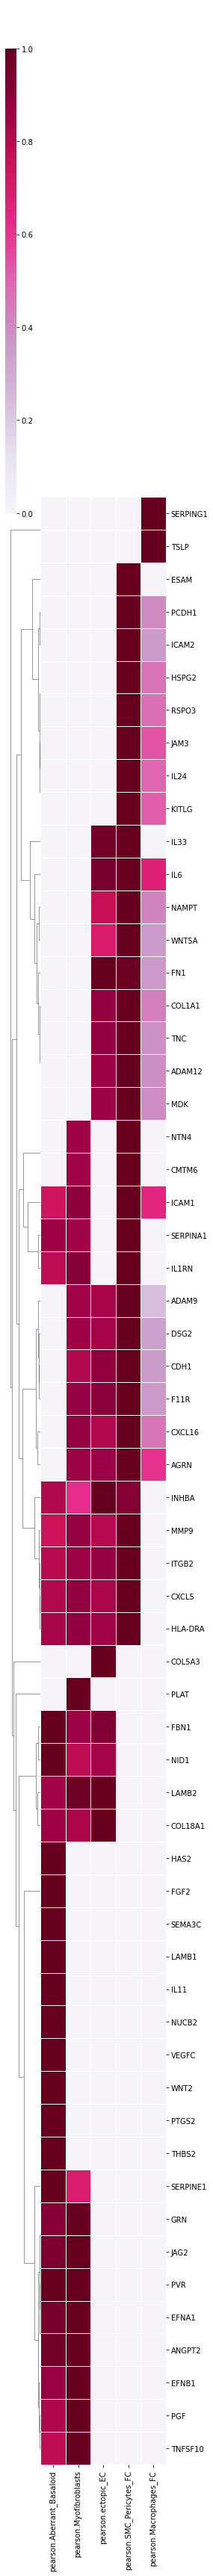

In [19]:
sb.clustermap(master_pearson.transpose(), square=True, method = 'weighted',
              cmap = 'PuRd', figsize = (4,48), col_cluster=False,
              linewidths = 1, linecolor = 'white')
plt.savefig(fig_dir + '221030_NicheNet_MASTER_cell_circuits_ligand_pearson_heatmap_EXVIVO.pdf', dpi=300, bbox_inches='tight')
plt.show()